C:\Anaconda\lib\site-packages\ipykernel_launcher.py:111: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


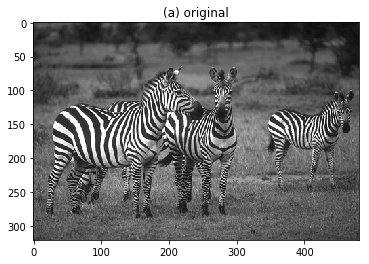

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:119: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


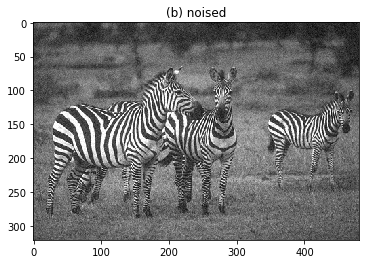

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:125: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


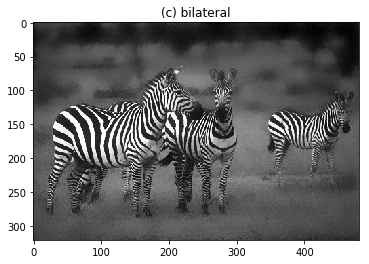

34.37200522266107


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:132: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


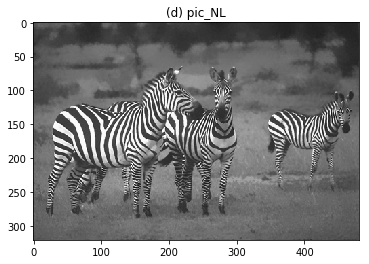

37.26662548376197
-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9
10


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:139: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


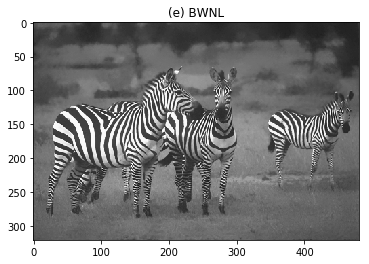

36.68335860166116


In [4]:
import numpy as np
from scipy.misc import imread, imsave
import matplotlib.pyplot as plt
import math

def  noise(img, sigma0):
    n1,n2=img.shape
    img_test=img+sigma0*np.random.randn(n1,n2)
    for i in range (n1):
        for j in range (n2):
            if img_test[i,j]>255:
                img_test[i,j]=255
            if img_test[i,j]<0:
                img_test[i,j]=0
    return img_test

def imshift(x, p, q):
    n1=x.shape[1]#columns
    n2=x.shape[0]#rows
    k=p%n2
    l=q%n1
    xshifted=np.zeros([n2,n1])
    xshifted[n2-k:n2,0:l]=x[0:k,n1-l:n1]
    xshifted[0:n2-k,l:n1]=x[k:n2,0:n1-l]
    xshifted[0:n2-k,0:l]=x[k:n2,n1-l:n1]
    xshifted[n2-k:n2,l:n1]=x[0:k,0:n1-l]
    return xshifted

#bilateral filter
def imbilateral(img, sigma, s1, s2, h):
    (n1,n2)=img.shape
    naive=np.zeros((n1,n2), dtype=np.uint8)
    dominator=16*h*sigma**2
    sum=np.zeros((n1,n2))
    bilateral=np.zeros((n1,n2))
    numerator=np.zeros((n1,n2))
    z=np.zeros((n1,n2))
    phi=np.zeros((n1,n2))
    for k in range (-s1,s1+1):
        for l in range (-s2,s2+1):
            numerator=2*sigma**2-np.power(imshift(img,k,l)-img,2)
            numerator[numerator>0]=0
            phi=np.exp(numerator/dominator)
            z=z+phi
            sum=sum+phi*imshift(img,k,l)
    numerator=sum/z
    return numerator

#Non-local means filter
def imnlmeans(img, sigma, s1, s2, p1,p2, h):
    n1,n2=img.shape
    p=(2*p1+1)*(2*p2+1)
    z=np.zeros((n1,n2))
    sum=np.zeros((n1,n2))
    for k in range (-s1,s1+1):
        for l in range (-s2,s2+1):
            alpha=np.zeros((n1,n2))
            for u in range (-p1,p1+1):
                for v in range (-p2,p2+1):
                    temp=np.power(imshift(img, k+u, l+v)-imshift(img, u, v),2)
                    alpha=alpha+temp
            numerator=alpha/p-2*sigma**2
            numerator[numerator<0]=0
            phi=np.exp(numerator/((-16*h*sigma**2)/p))
            z=z+phi
            sum=sum+phi*imshift(img,k,l)
    x=sum/z
    return x

#BWNL-means filter 
def imblocknlmeans(img, sigma, s1, s2, p1,p2, h):
    n1,n2=img.shape
    p=(2*p1+1)*(2*p2+1)
    z=np.zeros((n1,n2))
    sum=np.zeros((n1,n2))
    for k in range (-s1,s1+1):
        print(k)
        for l in range (-s2,s2+1):
            for a in range (-p1,p1+1):
                for b in range (-p2,p2+1):
                    alpha=np.zeros((n1,n2))
                    for u in range (-p1,p1+1):
                        for v in range (-p2,p2+1):
                            temp=np.power(imshift(img, k+u+a, l+v+b)-imshift(img, u+a, v+b),2)
                            alpha=alpha+temp
                    numerator=alpha/p-2*sigma**2
                    numerator[numerator<0]=0
                    phi=np.exp(numerator/((-16*h*sigma**2)/p))
                    z=z+phi
                    sum=sum+phi*imshift(img,k,l)
    x=sum/z
    return x

#peak-signal-to-noise r
def impsnr(x,y):
    n1,n2=x.shape
    n=(2*n1+1)*(2*n2+1)
    sum=0
    for i in range (n1):
        for j in range (n2):
            sum=sum+((x[i,j]-y[i,j])**2)/n
    psnr=10*math.log10((255**2)/sum)
    return psnr


sigma0=10
sigma=10
s1=s2=10
p1=p2=1
h=1
pic=imread('zebra.png')
plt.imshow(pic, cmap='gray')
plt.title('(a) original')
plt.show()

pic_noise=noise(pic, sigma0)
plt.imshow(pic_noise, cmap='gray')
plt.title('(b) noised')
imsave('noised.png',pic_noise)
plt.show()

pic_bilateral=imbilateral(pic_noise, sigma, s1, s2, h)
plt.imshow(pic_bilateral, cmap='gray')
plt.title('(c) bilateral')
imsave('bilateral.png',pic_bilateral)
plt.show()
print(impsnr(pic,pic_bilateral))

pic_NL=imnlmeans(pic_noise, sigma, s1, s2, p1,p2, h)
plt.imshow(pic_NL, cmap='gray')
plt.title('(d) pic_NL')
imsave('NL.png',pic_NL)
plt.show()
print(impsnr(pic,pic_NL))

BWNL=imblocknlmeans(pic_noise, sigma, s1, s2, p1,p2, h)
plt.imshow(BWNL, cmap='gray')
plt.title('(e) BWNL')
imsave('BWNL.png',BWNL)
plt.show()
print(impsnr(pic,BWNL))